In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/data-for-regression-problem/university_admission.csv
/kaggle/input/data-for-regression-problem/Life_Expectancy_Data.csv


In [2]:
df_life = pd.read_csv('/kaggle/input/data-for-regression-problem/Life_Expectancy_Data.csv')

In [3]:
df_life.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
df_life['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [5]:
df_life = df_life.drop(columns='Status')

In [6]:
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2904 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total expenditure                2712 non-null   float64
 12  Diphtheria          

In [7]:
df_life.describe().astype('float64').round(0)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.0,2928.0,2928.0,2938.0,2744.0,2938.0,2385.0,2938.0,2904.0,2938.0,2919.0,2712.0,2919.0,2938.0,2490.0,2.286000e+03,2904.0,2904.0,2771.0,2775.0
mean,2008.0,69.0,165.0,30.0,5.0,738.0,81.0,2420.0,38.0,42.0,83.0,6.0,82.0,2.0,7483.0,1.275338e+07,5.0,5.0,1.0,12.0
std,5.0,10.0,124.0,118.0,4.0,1988.0,25.0,11467.0,20.0,160.0,23.0,2.0,24.0,5.0,14270.0,6.101210e+07,4.0,5.0,0.0,3.0
min,2000.0,36.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,2.0,0.0,2.0,3.400000e+01,0.0,0.0,0.0,0.0
25%,2004.0,63.0,74.0,0.0,1.0,5.0,77.0,0.0,19.0,0.0,78.0,4.0,78.0,0.0,464.0,1.957930e+05,2.0,2.0,0.0,10.0
50%,2008.0,72.0,144.0,3.0,4.0,65.0,92.0,17.0,44.0,4.0,93.0,6.0,93.0,0.0,1767.0,1.386542e+06,3.0,3.0,1.0,12.0
75%,2012.0,76.0,228.0,22.0,8.0,442.0,97.0,360.0,56.0,28.0,97.0,7.0,97.0,1.0,5911.0,7.420359e+06,7.0,7.0,1.0,14.0
max,2015.0,89.0,723.0,1800.0,18.0,19480.0,99.0,212183.0,87.0,2500.0,99.0,18.0,99.0,51.0,119173.0,1.293859e+09,28.0,29.0,1.0,21.0


<Axes: >

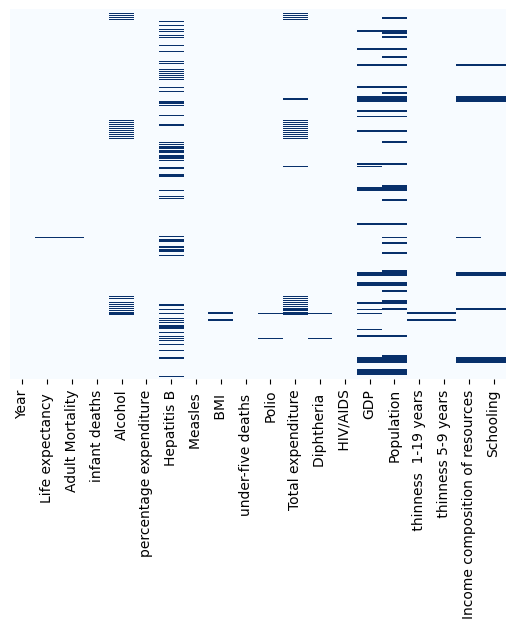

In [8]:
sns.heatmap(df_life.isnull(),yticklabels=False,cbar=False,cmap='Blues')

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Life expectancy '}>,
        <Axes: title={'center': 'Adult Mortality'}>,
        <Axes: title={'center': 'infant deaths'}>],
       [<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'percentage expenditure'}>,
        <Axes: title={'center': 'Hepatitis B'}>,
        <Axes: title={'center': 'Measles '}>],
       [<Axes: title={'center': ' BMI '}>,
        <Axes: title={'center': 'under-five deaths '}>,
        <Axes: title={'center': 'Polio'}>,
        <Axes: title={'center': 'Total expenditure'}>],
       [<Axes: title={'center': 'Diphtheria '}>,
        <Axes: title={'center': ' HIV/AIDS'}>,
        <Axes: title={'center': 'GDP'}>,
        <Axes: title={'center': 'Population'}>],
       [<Axes: title={'center': ' thinness  1-19 years'}>,
        <Axes: title={'center': ' thinness 5-9 years'}>,
        <Axes: title={'center': 'Income composition of resources'}>,
        <Axes: title={'center

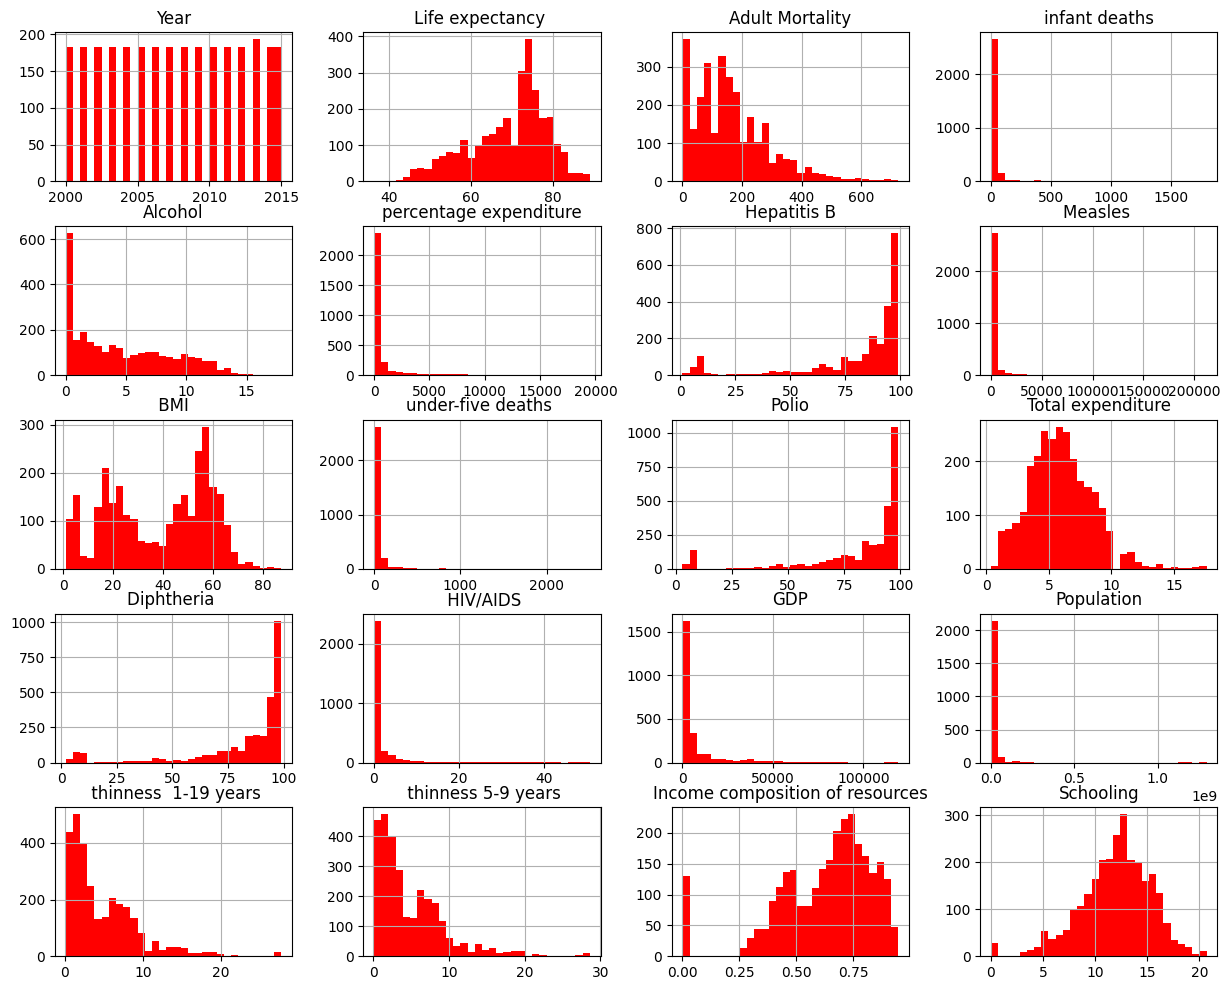

In [9]:
df_life.hist(bins=30,color='r',figsize=(15,12))

In [10]:
df_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   int64  
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   infant deaths                    2938 non-null   int64  
 4   Alcohol                          2744 non-null   float64
 5   percentage expenditure           2938 non-null   float64
 6   Hepatitis B                      2385 non-null   float64
 7   Measles                          2938 non-null   int64  
 8    BMI                             2904 non-null   float64
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total expenditure                2712 non-null   float64
 12  Diphtheria          

<Axes: >

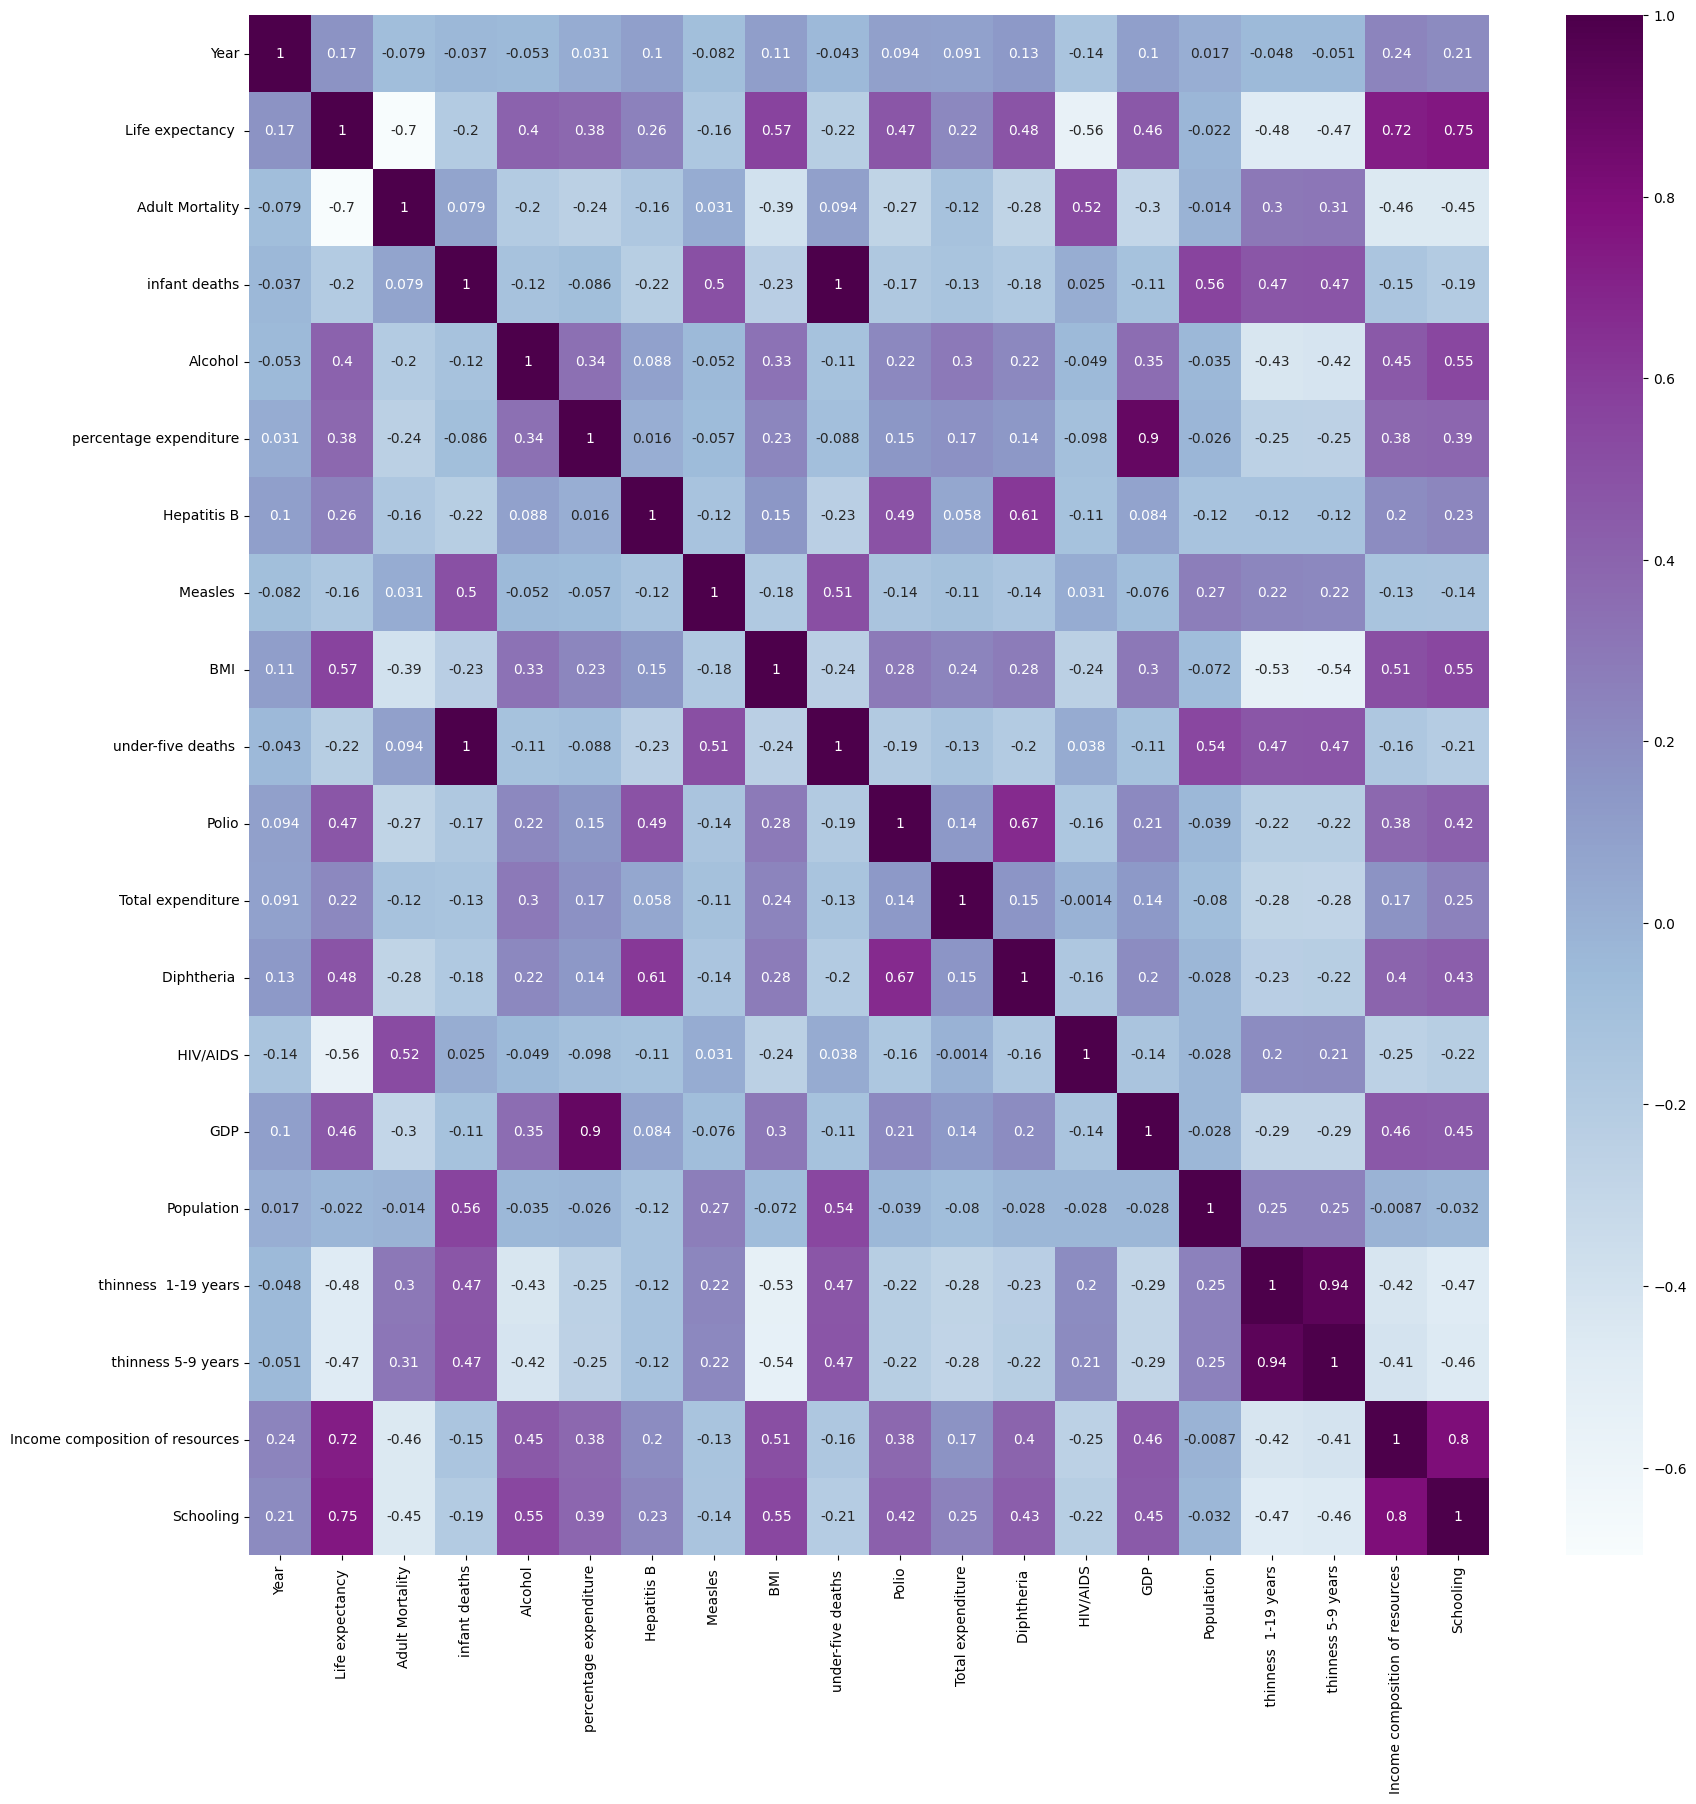

In [11]:
plt.figure(figsize=(20,20))
corr_matrix = df_life.corr()
sns.heatmap(corr_matrix,cmap='BuPu',annot=True)

In [12]:
df_life.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [13]:
df_life = df_life.apply(lambda x: x.fillna(x.mean()),axis=0)

In [14]:
df_life.isnull().sum()

Year                               0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

<Axes: >

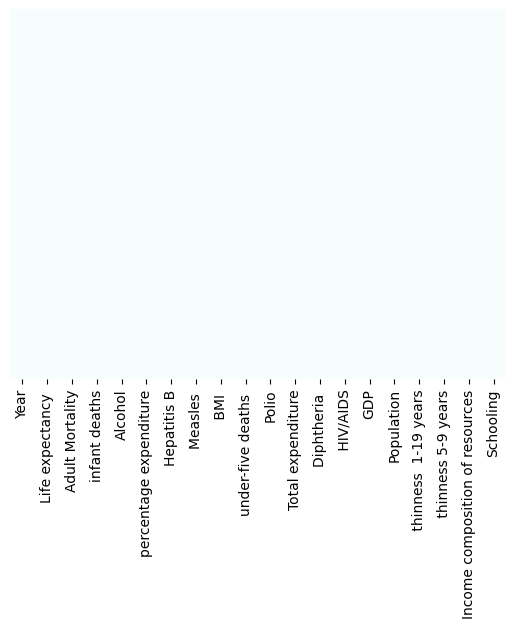

In [15]:
sns.heatmap(df_life.isnull(),yticklabels=False,cbar=False,cmap='BuPu')

In [16]:
#splitting data
Y = df_life['Life expectancy ']
X = df_life.drop(columns='Life expectancy ')

In [17]:
Y.shape

(2938,)

In [18]:
X.shape

(2938, 19)

In [19]:
X = np.array(X).astype('float32')
Y = np.array(Y).astype('float32')

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3)

In [22]:
import xgboost as xgb

In [23]:
model_life = xgb.XGBRegressor(objective="reg:squarederror",learning_rate=0.1,max_depth=30,n_estimators=100)

In [24]:
model_life.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=30, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
result_life = model_life.score(X_test,Y_test)
print('Accuracy: {}'.format(result_life))

Accuracy: 0.9580365975894964


In [26]:
y_predict_life = model_life.predict(X_test)
y_predict_life

array([45.39909 , 78.55152 , 75.971306, 76.0495  , 85.67443 , 71.95442 ,
       63.72063 , 58.5341  , 74.426765, 74.57708 , 65.32723 , 73.99143 ,
       67.418365, 63.269917, 73.13561 , 73.838   , 81.169174, 69.00442 ,
       74.38485 , 69.92844 , 74.09146 , 60.78253 , 52.368294, 82.32536 ,
       72.06474 , 73.13003 , 81.85934 , 58.535625, 65.51107 , 82.1704  ,
       74.60549 , 70.132706, 69.20322 , 75.83082 , 63.29407 , 61.174328,
       60.354424, 73.32895 , 62.59619 , 51.09149 , 74.34752 , 57.462494,
       67.01824 , 80.066536, 53.586414, 60.235474, 74.58313 , 72.9196  ,
       60.021374, 68.09586 , 55.535927, 71.8595  , 79.77879 , 59.08585 ,
       76.481636, 75.68456 , 63.0081  , 53.302444, 65.76711 , 66.02995 ,
       68.81629 , 74.66852 , 68.44692 , 71.29558 , 75.53235 , 80.06862 ,
       72.59249 , 62.0265  , 73.219864, 71.681984, 73.8708  , 81.756256,
       72.903755, 67.029274, 68.17771 , 73.83359 , 81.70103 , 73.039116,
       57.504868, 54.86301 , 54.32103 , 73.36625 , 

In [27]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE =float(format(np.sqrt(mean_squared_error(Y_test,y_predict_life)),'.3f'))
MSE = mean_squared_error(Y_test,y_predict_life)
MAE = mean_absolute_error(Y_test,y_predict_life)
R2 = r2_score(Y_test,y_predict_life)

adj_r2 = 1-(1-R2)*(n-1)/(n-k-1)
print("RMSE=", RMSE, '\nMSE=', MSE, "\nMAE=", MAE, "\nR2=", R2,"\nAdjusted R2", adj_r2)

RMSE= 1.948 
MSE= 3.7945025 
MAE= 1.1730511 
R2= 0.9580365975894964 
Adjusted R2 0.9571116502045781
